In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import argparse
from jkplot import *

os.sys.path.append('../code/utils/')
import flowlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# dResult = ['../result/ours/', '../result/ours_03_24/', '../result/ours_old/', '../result/kyoto/']
# dResult = ['../result/ours/']
dResult = ['../result/anneal/']

##############################
# parsing arguments to be used in output file name
##############################
parser = argparse.ArgumentParser(description='optical flow')
parser.set_defaults()
parser.add_argument('--seq', type=int, default=4, help='sequence number in middlebury(0~7)')
parser.add_argument('-n', '--niter', type=int, default='3', help='iteration number')
parser.add_argument('-p', '--pyramid', type=int, default='2', help='number of scales in pyramid')
parser.add_argument('-a', '--adaptive', type=int, default='0', help='number of scales in pyramid')

parser.add_argument('--lambd', type=float, default='0.9', help='constant lambda')
parser.add_argument('--dBeta', type=float, default='20', help='beta in adaptive')

parser.add_argument('--dHuberData', type=float, default='0.1')
parser.add_argument('--dHuberRegular', type=float, default='0.5')
parser.add_argument('-s', '--dWeightSplit', type=float, default='0.1', help='step size (small value is large step)')

parser.add_argument('--dHuberLight', type=float, default='0.3')
parser.add_argument('--dWeightLight', type=float, default='20.00001')
parser.add_argument('--param1', type=float, default='-1')
parser.add_argument('--alpha', type=float, default='0.5')
parser.add_argument('--alphaMode', type=int, default=0, help='alpha mode: 0, 1, 2')
parser.add_argument('--alphaRatio', type=float, default='1')
parser.add_argument('-v', '--verbose', type=int, default=0, help='verbose mode')

# creates an instance of jkplot


_StoreAction(option_strings=['-v', '--verbose'], dest='verbose', nargs=None, const=None, default=0, type=<class 'int'>, choices=None, help='verbose mode', metavar=None)

In [7]:
seq_list = ['Dimetrodon','Grove2','Grove3','Hydrangea',
            'RubberWhale','Urban2','Urban3','Venus']
# HuberL1 result in Werlberger's thesis
# 0.186, 0.217, 0.625, 0.235,
# 0.149, 0.370, 0.485

# ground truth
gt = []
for i,seq in enumerate(seq_list):
    fGT = '../data/other-gt-flow/'+seq+'/flow10.flo'
    gt.append(flowlib.read_flow(fGT))

## Best results

## Plot energy

In [8]:
jp = JKPlot(['../result/anneal/'], parser, ext='npy')
seq = 2
res1, args, ff = jp.load_result(seq=seq, alphaMode=0)
res2, args, ff = jp.load_result(seq=seq, alphaMode=3)

Namespace(adaptive=0, alpha=5.0, alphaMode=0, alphaRatio=0.96, dBeta=1.0, dHuberData=0.01, dHuberLight=0.3, dHuberRegular=0.3, dWeightLight=0.0, dWeightSplit=0.1, lambd=0.995, niter=1000, param1=0.02, pyramid=1, seq=2, verbose=1)
Namespace(adaptive=0, alpha=5.0, alphaMode=3, alphaRatio=0.96, dBeta=1.0, dHuberData=0.01, dHuberLight=0.3, dHuberRegular=0.3, dWeightLight=0.0, dWeightSplit=0.1, lambd=0.995, niter=1000, param1=0.02, pyramid=1, seq=2, verbose=1)


In [19]:
from matplotlib import rc
import matplotlib as mpl

plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['font.size'] = 25
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = False

# rc('font',**{'family':'serif','serif':['Times']})
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})
# rc('text', usetex=True)

# font = {'size'   : 24,
#         'family' : 'Arial'
#        'weight'  : 'bold',
#        }

# plt.rc('font', **font)
# plt.rc('font', family='serif', serif='cm10')
# plt.rc('text', usetex=True)

# plt.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
# mpl.rcParams['font.family'] = 'Arial'


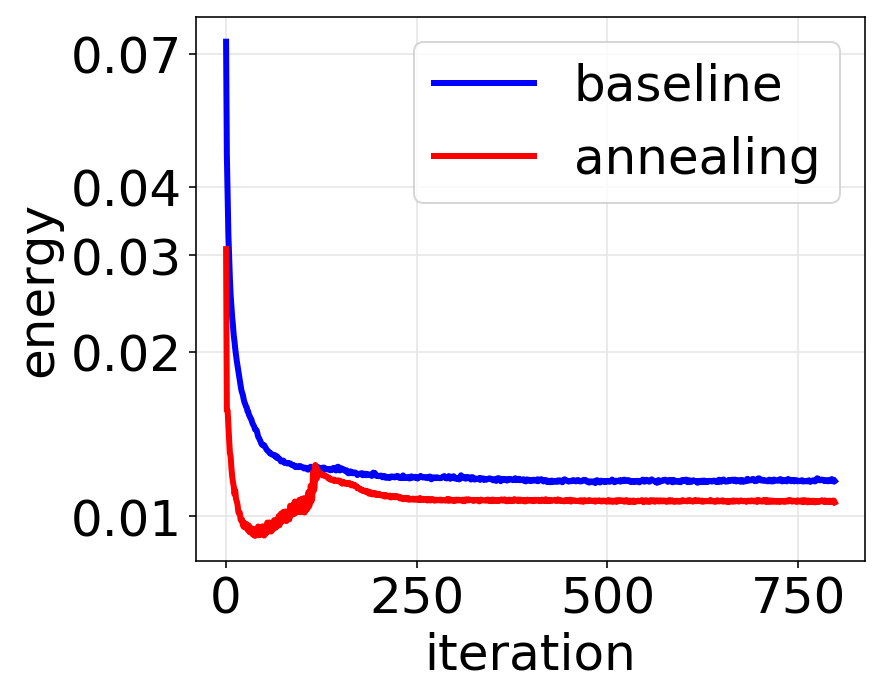

In [27]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

eiter = 800
lw = 3
gridcolor = '0.9'

xdim = np.arange(1, args.niter+1)

fig1 = plt.figure()
plt.xlabel('iteration')
plt.ylabel('energy')
plt.semilogy(res1[4]['energy'][1:eiter], 'b', label='baseline', linewidth=lw)
plt.plot(res2[4]['energy'][1:eiter], 'r', label='annealing', linewidth=lw)
plt.grid(True, ls="-", color=gridcolor)
plt.legend()

ax = plt.gca()
ax.yaxis.set_minor_locator(mpl.ticker.NullLocator())
# ax.yaxis.set_tick_params(which='major',reset=True)
ax.yaxis.set_ticks([0.01, 0.02, 0.03, 0.04, 0.07])
ax.yaxis.set_ticklabels(['0.01', '0.02', '0.03', '0.04', '0.07'])


# ax1 = fig1.get_axes()
# fig1.legend()
plt.savefig('energy_vs_iter.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

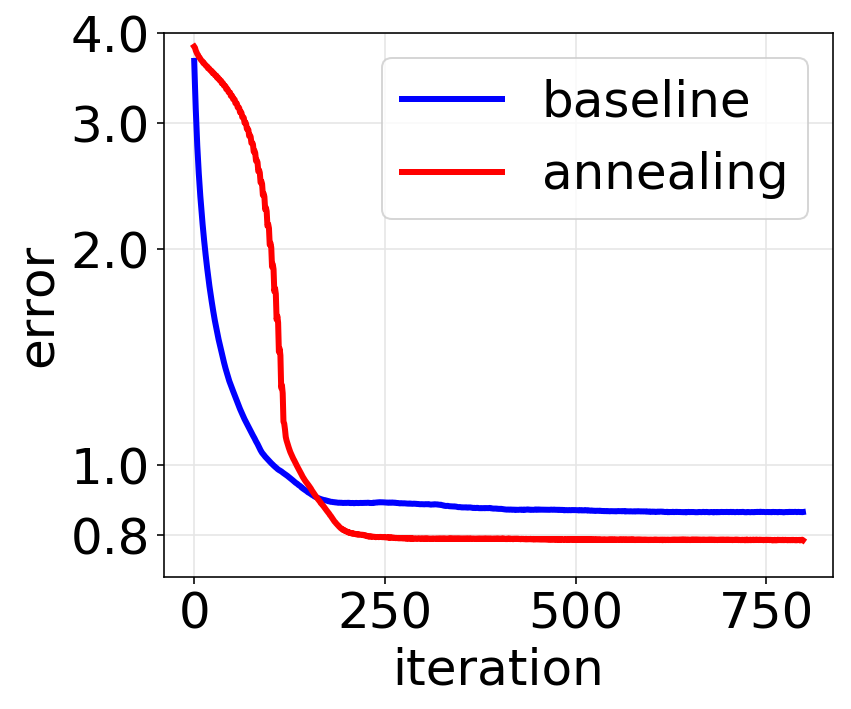

In [31]:

plt.semilogy(res1[4]['ape'][1:eiter], 'b', label='baseline', linewidth=lw)
plt.semilogy(res2[4]['ape'][1:eiter], 'r', label='annealing', linewidth=lw)
# plt.yscale('log')

ax = plt.gca()
plt.gca().yaxis.set_minor_locator(mpl.ticker.NullLocator())

# plt.ylim([0.71, 3.999])
ax.yaxis.set_ticks([0.8, 1, 2, 3, 4])
ax.yaxis.set_ticklabels(['0.8', '1.0', '2.0', '3.0', '4.0'])

# # plt.tick_params(axis='y', which='minor')
# # ax.yaxis.set_minor_formatter(ScalarFormatter())
# # ax.yaxis.set_major_formatter(ScalarFormatter())

plt.ylim([0.7, 4.])
ax.yaxis.grid(True, which='minor', color=gridcolor)
ax.xaxis.grid(True, which='major', color=gridcolor)
plt.grid(True,which="major",ls="-", color=gridcolor)
plt.legend()


# plt.minorticks_on()

# ax2 = fig2.get_axes()
plt.xlabel('iteration')
plt.ylabel('error')

plt.savefig('epe_vs_iter.pdf', bbox_inches='tight', pad_inches=0)